## Model Training

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
pd.set_option('display.max_columns', None)

In [11]:
df = pd.read_csv("../data/processed/processed_customer_churn_data.csv")

df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,...,total_revenue,customer_status,has_offer,offer_popularity,tenure_category,engagement_score,high_value,num_addon_services,has_extra_internet_charges,churned
1535,2242-MFOTG,Male,29,No,0,Poway,92064,32.984395,-117.013454,0,...,3451.73,Stayed,0,0.550476,2-4 Years,3,False,1,0,False
2208,3162-ZJZFU,Male,25,Yes,2,Mill Creek,96061,40.331975,-121.460674,5,...,6068.94,Stayed,0,0.550476,4+ Years,4,True,2,0,False
7000,9932-WBWIK,Male,43,No,0,Lake Isabella,93240,35.607875,-118.466318,0,...,741.93,Stayed,1,0.085475,0-1 Year,0,False,0,0,False
4925,6927-WTFIV,Male,78,No,0,Redwood City,94061,37.461251,-122.235414,0,...,1503.40,Churned,1,0.085475,1-2 Years,1,False,0,0,True
1678,2450-ZKEED,Female,33,No,0,Mammoth Lakes,93546,37.550074,-118.837167,0,...,733.17,Stayed,1,0.085475,0-1 Year,3,False,2,0,False
5014,7047-YXDMZ,Male,59,No,0,Vallejo,94591,38.105733,-122.186338,0,...,1139.89,Stayed,1,0.085475,1-2 Years,0,False,0,0,False


In [19]:
df['customer_status'] = df['churned'].apply(lambda x : 1 if x == True else 0)

df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,has_extra_internet_charges,tenure_category,engagement_score,high_value,num_addon_services,churned
259,0384-RVBPI,Male,64,No,0,Turlock,95380,37.474396,-120.875917,0,20,Offer D,Yes,12,No,Yes,DSL,29.0,Yes,No,Yes,No,No,Yes,Yes,Yes,Month-to-Month,No,Credit Card,64.40,1398.60,0.0,0,252.00,1650.60,0,1,0.085475,0,1-2 Years,5,False,2,False
4868,6859-RKMZJ,Male,38,Yes,0,Vallejo,94589,38.161321,-122.271588,6,11,No Offer,Yes,44,No,Yes,DSL,15.0,No,No,No,No,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,-10.00,608.15,0.0,0,486.20,1094.35,0,0,0.550476,0,0-1 Year,2,False,0,False
605,0886-QGENL,Female,72,Yes,0,San Diego,92104,32.741499,-117.127409,1,27,No Offer,Yes,45,No,Yes,Fiber Optic,13.0,Yes,No,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,101.25,2754.45,0.0,0,1237.14,3991.59,1,0,0.550476,0,2-4 Years,5,False,2,True
5349,7554-NEWDD,Male,44,No,0,Long Beach,90815,33.797638,-118.116620,0,10,No Offer,Yes,32,Yes,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,No,Bank Withdrawal,25.70,251.60,0.0,0,321.00,572.60,0,0,0.550476,0,0-1 Year,1,False,0,False
5039,7083-YNSKY,Female,22,No,0,Lodi,95242,38.128087,-121.407800,0,15,Offer D,Yes,45,Yes,No,No Internet,0.0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,25.40,399.60,0.0,0,687.60,1087.20,1,1,0.085475,0,1-2 Years,1,False,0,True
6604,9388-ZEYVT,Male,63,No,0,Gardena,90247,33.890853,-118.297967,0,43,Offer B,No,0,No,Yes,DSL,11.0,No,No,Yes,Yes,No,Yes,Yes,Yes,One Year,No,Bank Withdrawal,-6.00,1931.30,0.0,0,0.00,1931.30,0,1,0.116996,0,2-4 Years,5,False,2,False


In [20]:
df[['churned', 'customer_status']]

,churned,customer_status
0,False,0
1,False,0
2,True,1
3,True,1
4,True,1
...,...,...
7038,False,0
7039,True,1
7040,False,0
7041,False,0


In [17]:
df.shape

(7043, 44)

#### **MODEL with Hyperparameter Tuning**

In [34]:
!pip install category_encoders

In [35]:
!pip install catboost

In [36]:
!pip install optuna

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from category_encoders import CatBoostEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import OneHotEncoder


from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, cross_validate

from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, 
    recall_score, f1_score, confusion_matrix, classification_report
)

In [10]:
import optuna
from optuna.visualization import plot_param_importances, plot_optimization_history
from optuna.exceptions import TrialPruned

import joblib

import sys
import os
from src.logger import logging

In [21]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,has_extra_internet_charges,tenure_category,engagement_score,high_value,num_addon_services,churned
2275,3253-HKOKL,Female,31,Yes,2,Elk Grove,95758,38.353630,-121.441950,7,52,No Offer,Yes,7,No,Yes,Fiber Optic,19.0,Yes,No,Yes,No,Yes,Yes,Yes,Yes,One Year,No,Bank Withdrawal,100.30,5244.45,0.00,0,415.48,5659.93,0,0,0.550476,0,4+ Years,6,True,2,False
3285,4693-VWVBO,Female,60,No,0,Valley Springs,95252,38.156971,-120.849231,0,3,No Offer,Yes,40,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal,19.55,61.05,0.00,0,122.94,183.99,0,0,0.550476,0,0-1 Year,0,False,0,False
3423,4851-BQDNX,Male,56,Yes,1,Oxnard,93035,34.184540,-119.224666,5,40,No Offer,Yes,14,No,Yes,Fiber Optic,22.0,No,No,Yes,No,Yes,No,No,Yes,One Year,Yes,Bank Withdrawal,85.05,3355.65,38.15,0,576.40,3893.90,0,0,0.550476,0,2-4 Years,3,False,1,False
2788,3967-VQOGC,Female,54,Yes,1,Leggett,95585,39.873371,-123.741474,4,67,No Offer,Yes,17,Yes,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,Yes,Credit Card,24.90,1680.25,0.00,0,1167.81,2848.06,0,0,0.550476,0,4+ Years,1,False,0,False
5100,7164-BPTUT,Male,55,No,2,Banning,92220,33.936298,-116.849577,0,57,Offer B,Yes,9,Yes,Yes,Cable,20.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,No,Mailed Check,89.55,5012.35,30.45,0,533.52,5515.42,0,1,0.116996,0,4+ Years,9,True,4,False
6638,9436-ZBZCT,Male,40,No,0,Inglewood,90303,33.936291,-118.332639,0,14,Offer D,Yes,28,Yes,Yes,Cable,27.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,89.95,1178.40,0.00,0,401.10,1579.50,1,1,0.085475,0,1-2 Years,4,False,1,True


In [22]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [23]:
num_cols

['age',
 'number_of_dependents',
 'zip_code',
 'latitude',
 'longitude',
 'number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'customer_status',
 'has_offer',
 'offer_popularity',
 'has_extra_internet_charges',
 'engagement_score',
 'num_addon_services']

In [24]:
cat_cols

['customer_id',
 'gender',
 'married',
 'city',
 'offer',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'tenure_category']

In [25]:
num_cols = [col for col in num_cols if col != 'customer_status']

num_cols

['age',
 'number_of_dependents',
 'zip_code',
 'latitude',
 'longitude',
 'number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'has_offer',
 'offer_popularity',
 'has_extra_internet_charges',
 'engagement_score',
 'num_addon_services']

In [46]:
cat_cols = [col for col in cat_cols if col != 'customer_id']

cat_cols

['gender',
 'married',
 'city',
 'offer',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'tenure_category']

In [26]:
# Prepare data
X = df[num_cols + cat_cols]
y = df['customer_status']

In [27]:
y.value_counts()

customer_status
0    5174
1    1869
Name: count, dtype: int64

In [28]:
X.shape, y.shape

((7043, 41), (7043,))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#### First way of selecting the best feature

In [34]:
from sklearn.preprocessing import OrdinalEncoder

# ----------------- Fast Feature Selection -----------------
def select_features(
        X_train, y_train,
        num_cols, cat_cols,
        quantile_threshold=0.5,
        top_k=None,
        random_state=42):

    """Select top features using an ensemble of tree models.
       UPDATED: Models now handle class imbalance internally.

    Parameters
    ----------
    X_train : pd.DataFrame
    y_train : pd.Series or np.array
    num_cols : list[str]      Numerical columns
    cat_cols : list[str]      Categorical columns
    quantile_threshold : float
        Quantile cut-off if top_k is None.
    top_k : int | None
        If set, keeps the k most important features overall.
    random_state : int
    """
    # --- 1. Pre-processing: ordinal-encode categoricals via ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(
                handle_unknown='use_encoded_value', unknown_value=-1
            ), cat_cols)
        ],
        remainder='passthrough',
        verbose_feature_names_out=False
    )

    X_proc = preprocessor.fit_transform(X_train)
    feature_names = (cat_cols + num_cols)
    X_proc = pd.DataFrame(X_proc, columns=feature_names, index=X_train.index)

    # --- 2. Initialise models with class imbalance handling
    # Calculate the scale_pos_weight for XGBoost
    # Assuming the minority class is the 'positive' class (label 1)
    class_counts = y_train.value_counts()
    scale_pos_weight = class_counts[0] / class_counts[1]
    
    models = {
        "RandomForest": RandomForestClassifier(
            n_estimators=100, random_state=random_state, class_weight='balanced'),
        "XGBoost": XGBClassifier(
            n_estimators=100, random_state=random_state, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight),
        "LightGBM": lgb.LGBMClassifier(
            n_estimators=100, random_state=random_state, class_weight='balanced')
    }

    # --- 3. Collect feature importances
    feature_importances = pd.DataFrame(index=X_proc.columns)

    for name, model in models.items():
        model.fit(X_proc, y_train)
        if hasattr(model, 'feature_importances_'):
            feature_importances[name] = model.feature_importances_

    # --- 4. Average & sort
    feature_importances['Average'] = feature_importances.mean(axis=1)
    feature_importances.sort_values('Average', ascending=False, inplace=True)

    # --- 5. Select features
    if top_k is not None:
        top_features = feature_importances['Average'].nlargest(top_k).index.tolist()
    else:
        thresh = feature_importances['Average'].quantile(quantile_threshold)
        top_features = feature_importances[feature_importances['Average'] > thresh].index.tolist()

    # --- 6. Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x=feature_importances['Average'],
        y=feature_importances.index,
        palette='viridis'
    )
    plt.title('Feature Importances (Average over Models)')
    plt.tight_layout()
    plt.show()

    return top_features, feature_importances

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2776
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


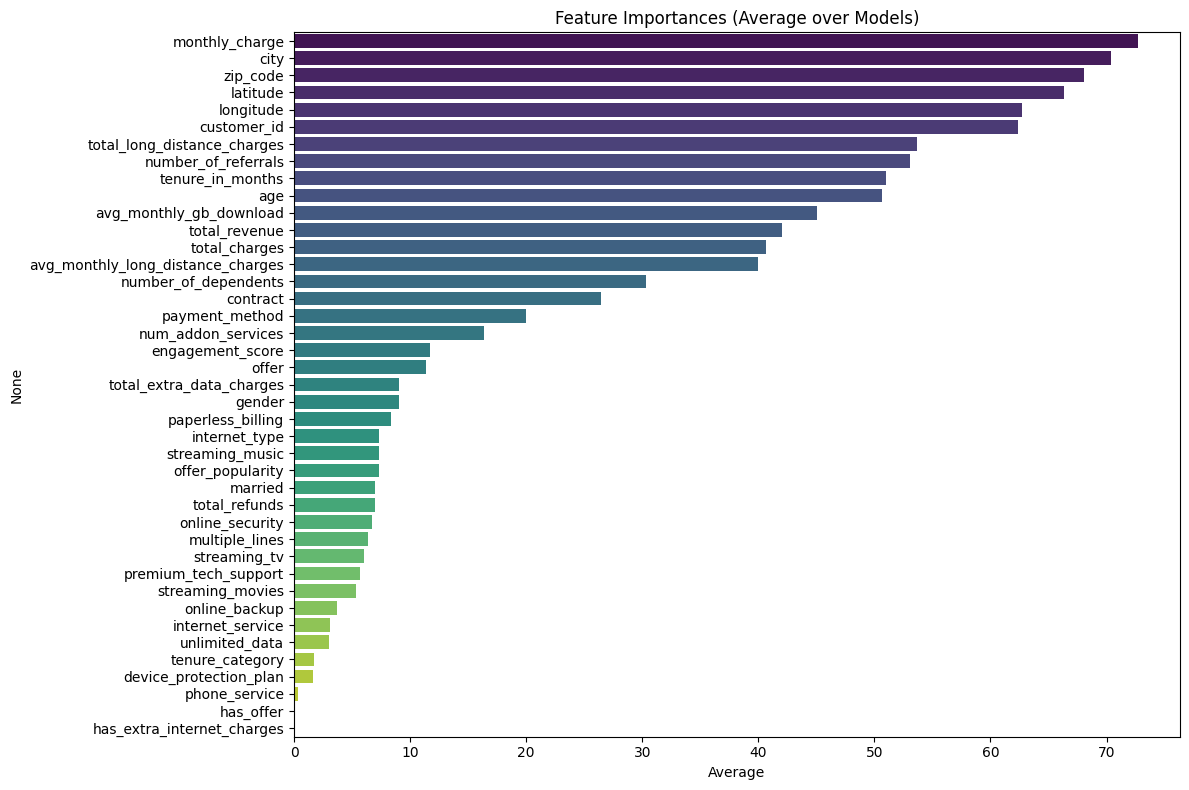

Selected 23 features:
['monthly_charge', 'city', 'zip_code', 'latitude', 'longitude', 'customer_id', 'total_long_distance_charges', 'number_of_referrals', 'tenure_in_months', 'age', 'avg_monthly_gb_download', 'total_revenue', 'total_charges', 'avg_monthly_long_distance_charges', 'number_of_dependents', 'contract', 'payment_method', 'num_addon_services', 'engagement_score', 'offer', 'total_extra_data_charges', 'gender', 'paperless_billing']


In [35]:
top_features, fi_df = select_features(
    X_train, y_train, num_cols, cat_cols,
    top_k=23
)

print(f"Selected {len(top_features)} features:\n{top_features}")

In [68]:
# Filter datasets
X_train_sel = X_train[top_features]
X_test_sel = X_test[top_features]

In [69]:
sampleN = df[top_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
sampleC = df[top_features].select_dtypes(include=['object', 'category']).columns.tolist()

In [70]:
sampleN

['monthly_charge',
 'zip_code',
 'latitude',
 'longitude',
 'age',
 'total_long_distance_charges',
 'number_of_referrals',
 'total_charges',
 'avg_monthly_gb_download',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'total_revenue',
 'number_of_dependents',
 'engagement_score',
 'total_extra_data_charges',
 'num_addon_services',
 'total_refunds']

In [71]:
sampleC

['city',
 'contract',
 'payment_method',
 'offer',
 'internet_type',
 'paperless_billing']

In [72]:
y

0       0
1       0
2       1
3       1
4       1
       ..
7038    0
7039    1
7040    0
7041    0
7042    0
Name: customer_status, Length: 7043, dtype: int64

In [73]:
tempdf = df[top_features]

tempdf['customer_status'] = y

tempdf.sample(6)

,monthly_charge,city,zip_code,latitude,longitude,age,total_long_distance_charges,number_of_referrals,total_charges,avg_monthly_gb_download,tenure_in_months,avg_monthly_long_distance_charges,total_revenue,number_of_dependents,contract,payment_method,engagement_score,total_extra_data_charges,offer,internet_type,num_addon_services,paperless_billing,total_refunds,customer_status
255,99.85,Newport Beach,92660,33.634626,-117.874882,72,1190.00,0,3343.15,12.0,34,35,4533.15,0,One Year,Bank Withdrawal,5,0,No Offer,Fiber Optic,2,Yes,0.0,0
3153,44.65,Encino,91436,34.152875,-118.486056,39,0.00,0,1156.55,6.0,26,0,1156.55,0,Month-to-Month,Bank Withdrawal,5,0,No Offer,DSL,2,Yes,0.0,0
4131,50.00,Sunnyvale,94086,37.378541,-122.020456,30,311.94,0,892.70,69.0,18,17,1254.64,0,Month-to-Month,Credit Card,2,50,No Offer,DSL,1,Yes,0.0,0
4169,70.05,Alleghany,95910,39.467828,-120.841386,42,434.25,0,657.50,24.0,9,48,1091.75,0,Month-to-Month,Credit Card,1,0,No Offer,Fiber Optic,0,No,0.0,0
1278,58.60,Elk Grove,95758,38.353630,-121.441950,23,1878.63,0,2224.50,58.0,39,48,4103.13,0,One Year,Credit Card,3,0,Offer C,DSL,1,Yes,0.0,0
3912,90.25,Chula Vista,91914,32.688506,-116.938632,38,938.00,0,6385.95,3.0,70,13,7423.95,0,One Year,Bank Withdrawal,5,100,No Offer,Fiber Optic,3,Yes,0.0,0


In [ ]:
tempdf.to_csv('../data/processed/best_features_customer_churn_data.csv', index=False)

#### Second way of selecting the feature

In [46]:
def optimize_model(
    X_train,
    y_train,
    X_test,
    y_test,
    cat_cols,
    n_trials: int = 50,
):
    """Run Optuna hyper‑parameter search with robust handling of categorical columns.

    Parameters
    ----------
    X_train, X_test : pd.DataFrame or array‑like
    y_train, y_test : pd.Series or array‑like
    cat_cols        : list[str]
        Names of categorical columns in the ORIGINAL training data.
    n_trials        : int, default 50
        Number of Optuna trials.

    Returns
    -------
    study          : optuna.study.Study
    best_model     : fitted estimator
    final_metrics  : dict[str, float]
    all_results    : list[dict]
    """

    # ✨ 1. Coerce inputs to pandas
    X_train = pd.DataFrame(X_train).reset_index(drop=True)
    X_test = pd.DataFrame(X_test).reset_index(drop=True)
    y_train = pd.Series(y_train).reset_index(drop=True)
    y_test = pd.Series(y_test).reset_index(drop=True)

    # ✨ 2. Ensure categorical columns are strings (avoids mixed dtypes)
    for col in cat_cols:
        if col in X_train.columns:
            X_train[col] = X_train[col].astype(str)
            X_test[col] = X_test[col].astype(str)

    # Meta‑vars
    study_results = []
    best_params: dict | None = None
    best_score: float = -np.inf
    n_classes: int = len(np.unique(y_train))
    average_method: str = "binary" if n_classes == 2 else "weighted"

    # ------------------------------------------------------------------
    # Optuna objective --------------------------------------------------
    # ------------------------------------------------------------------
    def objective(trial: optuna.trial.Trial) -> float:
        nonlocal best_params, best_score

        # 🔧 Choose preprocessing + learner ---------------------------
        encoder_type = trial.suggest_categorical(
            "encoder", ["onehot", "label", "CatBoost", "TargetEncoder"]
        )
        scaler_type = trial.suggest_categorical("scaler", ["standard", "minmax", "none"])
        model_name = trial.suggest_categorical(
            "model", ["XGBoost", "LightGBM", "CatBoost", "RandomForest"]
        )

        # 🔧 Model‑specific hyper‑parameters ---------------------------
        if model_name == "XGBoost":
            params = {
                "n_estimators": trial.suggest_int("xgb_n_estimators", 100, 500),
                "learning_rate": trial.suggest_float(
                    "xgb_learning_rate", 0.01, 0.3, log=True
                ),
                "max_depth": trial.suggest_int("xgb_max_depth", 3, 10),
                "subsample": trial.suggest_float("xgb_subsample", 0.6, 1.0),
                "colsample_bytree": trial.suggest_float(
                    "xgb_colsample_bytree", 0.6, 1.0
                ),
            }
        elif model_name == "LightGBM":
            params = {
                "n_estimators": trial.suggest_int("lgb_n_estimators", 100, 500),
                "learning_rate": trial.suggest_float(
                    "lgb_learning_rate", 0.01, 0.3, log=True
                ),
                "num_leaves": trial.suggest_int("lgb_num_leaves", 31, 511),
                "max_depth": trial.suggest_int("lgb_max_depth", -1, 10),
                "min_child_samples": trial.suggest_int(
                    "lgb_min_child_samples", 5, 100
                ),
            }
        elif model_name == "CatBoost":
            params = {
                "iterations": trial.suggest_int("cb_iterations", 100, 500),
                "learning_rate": trial.suggest_float(
                    "cb_learning_rate", 0.01, 0.3, log=True
                ),
                "depth": trial.suggest_int("cb_depth", 4, 10),
                "l2_leaf_reg": trial.suggest_float(
                    "cb_l2_leaf_reg", 1e-3, 10.0, log=True
                ),
            }
        else:  # RandomForest
            params = {
                "n_estimators": trial.suggest_int("rf_n_estimators", 100, 500),
                "max_depth": trial.suggest_int("rf_max_depth", 3, 30),
                "min_samples_split": trial.suggest_int("rf_min_samples_split", 2, 20),
                "min_samples_leaf": trial.suggest_int("rf_min_samples_leaf", 1, 20),
            }

        # 🔀 Cross‑validation -----------------------------------------
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        fold_scores: list[float] = []

        for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
            X_fold_train, X_fold_val = (
                X_train.iloc[train_idx].copy(),
                X_train.iloc[val_idx].copy(),
            )
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            # 🪄 Encoding -------------------------------------------
            for col in cat_cols:
                if col not in X_fold_train.columns:
                    continue

                if encoder_type == "onehot":
                    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
                    ohe.fit(X_fold_train[[col]])

                    train_encoded = ohe.transform(X_fold_train[[col]])
                    val_encoded = ohe.transform(X_fold_val[[col]])

                    feature_names = ohe.get_feature_names_out([col])
                    X_fold_train = pd.concat(
                        [
                            X_fold_train.drop(columns=[col]),
                            pd.DataFrame(
                                train_encoded,
                                columns=feature_names,
                                index=X_fold_train.index,
                            ),
                        ],
                        axis=1,
                    )
                    X_fold_val = pd.concat(
                        [
                            X_fold_val.drop(columns=[col]),
                            pd.DataFrame(
                                val_encoded,
                                columns=feature_names,
                                index=X_fold_val.index,
                            ),
                        ],
                        axis=1,
                    )

                elif encoder_type in {"CatBoost", "TargetEncoder"}:
                    encoder_cls = CatBoostEncoder if encoder_type == "CatBoost" else TargetEncoder
                    encoder = encoder_cls()
                    # ⚠️ Ensure float dtype
                    X_fold_train[col] = (
                        encoder.fit_transform(X_fold_train[col], y_fold_train).astype(float)
                    )
                    X_fold_val[col] = encoder.transform(X_fold_val[col]).astype(float)

                else:  # label
                    le = LabelEncoder()
                    X_fold_train[col] = le.fit_transform(X_fold_train[col])
                    unseen = ~X_fold_val[col].isin(le.classes_)
                    X_fold_val.loc[unseen, col] = -1
                    seen = X_fold_val[col].isin(le.classes_)
                    X_fold_val.loc[seen, col] = le.transform(X_fold_val.loc[seen, col])

            # 🏗️ Scaling --------------------------------------------
            if scaler_type != "none":
                scaler = StandardScaler() if scaler_type == "standard" else MinMaxScaler()
                num_cols = X_fold_train.select_dtypes(include="number").columns
                if len(num_cols):
                    X_fold_train[num_cols] = scaler.fit_transform(X_fold_train[num_cols])
                    X_fold_val[num_cols] = scaler.transform(X_fold_val[num_cols])

            # 🧠 Model ----------------------------------------------
            if model_name == "XGBoost":
                model = XGBClassifier(
                    **params,
                    random_state=42,
                    enable_categorical=False,
                    eval_metric="auc" if n_classes == 2 else "mlogloss",
                    objective="binary:logistic" if n_classes == 2 else "multi:softprob",
                )
            elif model_name == "LightGBM":
                model = lgb.LGBMClassifier(
                    **params,
                    random_state=42,
                    objective="binary" if n_classes == 2 else "multiclass",
                    metric="auc" if n_classes == 2 else "multi_logloss",
                )
            elif model_name == "CatBoost":
                model = CatBoostClassifier(
                    **params,
                    random_state=42,
                    verbose=0,
                    loss_function="Logloss" if n_classes == 2 else "MultiClass",
                )
            else:
                model = RandomForestClassifier(
                    **params, random_state=42, class_weight="balanced"
                )

            # 🚀 Fit & predict --------------------------------------
            try:
                model.fit(X_fold_train, y_fold_train)
                if hasattr(model, "predict_proba"):
                    y_proba = model.predict_proba(X_fold_val)
                    score = (
                        roc_auc_score(y_fold_val, y_proba[:, 1])
                        if n_classes == 2
                        else roc_auc_score(y_fold_val, y_proba, multi_class="ovr")
                    )
                else:
                    y_pred = model.predict(X_fold_val)
                    score = roc_auc_score(y_fold_val, y_pred)
            except Exception as e:
                # ❌ Any failure → prune trial
                trial.set_user_attr("failed_fold", fold)
                trial.set_user_attr("fail_msg", str(e))
                raise TrialPruned()

            fold_scores.append(score)

        avg_auc = float(np.mean(fold_scores))

        # 🔥 Track best
        study_results.append(
            {
                "trial": trial.number,
                "model": model_name,
                "encoder": encoder_type,
                "scaler": scaler_type,
                "auc": avg_auc,
                "params": trial.params,
            }
        )
        if avg_auc > best_score:
            best_score = avg_auc
            best_params = trial.params.copy()

        return avg_auc

    # 🏁 Run Optuna -------------------------------------------------------
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    # ------------------------------------------------------------------
    # 🏆 Train final model on full training set using best params -------
    # ------------------------------------------------------------------
    encoder_type = study.best_params["encoder"]
    scaler_type = study.best_params["scaler"]
    model_name = study.best_params["model"]

    # ---- Encode full training data -----------------------------------
    X_train_processed = X_train.copy()
    final_encoders: dict[str, object] = {}

    for col in cat_cols:
        if col not in X_train_processed.columns:
            continue

        if encoder_type == "onehot":
            ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
            ohe.fit(X_train_processed[[col]])
            encoded = ohe.transform(X_train_processed[[col]])
            feature_names = ohe.get_feature_names_out([col])
            X_train_processed = pd.concat(
                [
                    X_train_processed.drop(columns=[col]),
                    pd.DataFrame(encoded, columns=feature_names, index=X_train_processed.index),
                ],
                axis=1,
            )
            final_encoders[col] = ohe

        elif encoder_type in {"CatBoost", "TargetEncoder"}:
            encoder_cls = CatBoostEncoder if encoder_type == "CatBoost" else TargetEncoder
            encoder = encoder_cls()
            X_train_processed[col] = (
                encoder.fit_transform(X_train_processed[col], y_train).astype(float)
            )
            final_encoders[col] = encoder

        else:  # label
            encoder = LabelEncoder()
            X_train_processed[col] = encoder.fit_transform(X_train_processed[col])
            final_encoders[col] = encoder

    # ---- Scale full training data ------------------------------------
    final_scaler = None
    if scaler_type != "none":
        scaler = StandardScaler() if scaler_type == "standard" else MinMaxScaler()
        num_cols = X_train_processed.select_dtypes(include="number").columns
        if len(num_cols):
            X_train_processed[num_cols] = scaler.fit_transform(X_train_processed[num_cols])
            final_scaler = scaler

    # ---- Instantiate final model -------------------------------------
    if model_name == "XGBoost":
        final_model = XGBClassifier(
            n_estimators=study.best_params["xgb_n_estimators"],
            learning_rate=study.best_params["xgb_learning_rate"],
            max_depth=study.best_params["xgb_max_depth"],
            subsample=study.best_params["xgb_subsample"],
            colsample_bytree=study.best_params["xgb_colsample_bytree"],
            random_state=42,
            enable_categorical=False,
            eval_metric="auc" if n_classes == 2 else "mlogloss",
            objective="binary:logistic" if n_classes == 2 else "multi:softprob",
        )
    elif model_name == "LightGBM":
        final_model = lgb.LGBMClassifier(
            n_estimators=study.best_params["lgb_n_estimators"],
            learning_rate=study.best_params["lgb_learning_rate"],
            num_leaves=study.best_params["lgb_num_leaves"],
            max_depth=study.best_params["lgb_max_depth"],
            min_child_samples=study.best_params["lgb_min_child_samples"],
            random_state=42,
            objective="binary" if n_classes == 2 else "multiclass",
            metric="auc" if n_classes == 2 else "multi_logloss",
        )
    elif model_name == "CatBoost":
        final_model = CatBoostClassifier(
            iterations=study.best_params["cb_iterations"],
            learning_rate=study.best_params["cb_learning_rate"],
            depth=study.best_params["cb_depth"],
            l2_leaf_reg=study.best_params["cb_l2_leaf_reg"],
            random_state=42,
            verbose=0,
            loss_function="Logloss" if n_classes == 2 else "MultiClass",
        )
    else:  # RandomForest
        final_model = RandomForestClassifier(
            n_estimators=study.best_params["rf_n_estimators"],
            max_depth=study.best_params["rf_max_depth"],
            min_samples_split=study.best_params["rf_min_samples_split"],
            min_samples_leaf=study.best_params["rf_min_samples_leaf"],
            class_weight="balanced",
            random_state=42,
        )

    final_model.fit(X_train_processed, y_train)

    # ------------------------------------------------------------------
    # 🧪 Evaluate on test set ------------------------------------------
    # ------------------------------------------------------------------
    X_test_processed = X_test.copy()

    for col in cat_cols:
        if col not in X_test_processed.columns:
            continue

        if encoder_type == "onehot":
            ohe = final_encoders[col]
            encoded = ohe.transform(X_test_processed[[col]])
            feature_names = ohe.get_feature_names_out([col])
            X_test_processed = pd.concat(
                [
                    X_test_processed.drop(columns=[col]),
                    pd.DataFrame(encoded, columns=feature_names, index=X_test_processed.index),
                ],
                axis=1,
            )
        elif encoder_type in {"CatBoost", "TargetEncoder"}:
            encoder = final_encoders[col]
            X_test_processed[col] = encoder.transform(X_test_processed[col]).astype(float)
        else:
            encoder = final_encoders[col]
            unseen = ~X_test_processed[col].isin(encoder.classes_)
            X_test_processed.loc[unseen, col] = -1
            seen = X_test_processed[col].isin(encoder.classes_)
            X_test_processed.loc[seen, col] = encoder.transform(
                X_test_processed.loc[seen, col]
            )

    if scaler_type != "none" and final_scaler is not None:
        num_cols = X_test_processed.select_dtypes(include="number").columns
        if len(num_cols):
            X_test_processed[num_cols] = final_scaler.transform(X_test_processed[num_cols])

    # ---- Metrics ------------------------------------------------------
    if hasattr(final_model, "predict_proba"):
        y_pred = final_model.predict(X_test_processed)
        y_proba = final_model.predict_proba(X_test_processed)
    else:
        y_pred = final_model.predict(X_test_processed)
        y_proba = None

    final_metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average=average_method, zero_division=0),
        "recall": recall_score(y_test, y_pred, average=average_method, zero_division=0),
        "f1": f1_score(y_test, y_pred, average=average_method, zero_division=0),
    }

    if y_proba is not None:
        if n_classes == 2:
            final_metrics["auc"] = roc_auc_score(y_test, y_proba[:, 1])
        else:
            final_metrics["auc"] = roc_auc_score(y_test, y_proba, multi_class="ovr")
    else:
        # Some models may not support proba
        try:
            final_metrics["auc"] = roc_auc_score(y_test, y_pred)
        except ValueError:
            final_metrics["auc"] = np.nan

    return study, final_model, final_metrics, study_results

In [47]:
study, best_model, final_metrics, all_results = optimize_model(
    X_train_sel, y_train, X_test_sel, y_test, 
    [col for col in cat_cols if col in top_features],
    n_trials=40
)

[I 2025-07-23 12:21:17,239] A new study created in memory with name: no-name-b70d8e1a-2bea-4198-aad8-3cc30478489d
[I 2025-07-23 12:21:18,032] Trial 0 finished with value: 0.9091205714810845 and parameters: {'encoder': 'CatBoost', 'scaler': 'standard', 'model': 'XGBoost', 'xgb_n_estimators': 333, 'xgb_learning_rate': 0.011315399830079292, 'xgb_max_depth': 5, 'xgb_subsample': 0.8069736746794012, 'xgb_colsample_bytree': 0.7655294438133708}. Best is trial 0 with value: 0.9091205714810845.
[I 2025-07-23 12:21:19,225] Trial 1 finished with value: 0.8181338496460144 and parameters: {'encoder': 'TargetEncoder', 'scaler': 'none', 'model': 'XGBoost', 'xgb_n_estimators': 347, 'xgb_learning_rate': 0.03334009416764395, 'xgb_max_depth': 10, 'xgb_subsample': 0.687363666847435, 'xgb_colsample_bytree': 0.9310901599551704}. Best is trial 0 with value: 0.9091205714810845.
[I 2025-07-23 12:21:27,516] Trial 2 finished with value: 0.8966181542607478 and parameters: {'encoder': 'CatBoost', 'scaler': 'minmax'

[LightGBM] [Info] Number of positive: 997, number of negative: 2759
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2244
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265442 -> initscore=-1.017873
[LightGBM] [Info] Start training from score -1.017873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-07-23 12:21:32,440] Trial 4 finished with value: 0.8161300540492924 and parameters: {'encoder': 'TargetEncoder', 'scaler': 'minmax', 'model': 'LightGBM', 'lgb_n_estimators': 349, 'lgb_learning_rate': 0.023996915529247535, 'lgb_num_leaves': 58, 'lgb_max_depth': 9, 'lgb_min_child_samples': 34}. Best is trial 0 with value: 0.9091205714810845.
[I 2025-07-23 12:21:33,005] Trial 5 finished with value: 0.8973680745849405 and parameters: {'encoder': 'CatBoost', 'scaler': 'none', 'model': 'XGBoost', 'xgb_n_estimators': 291, 'xgb_learning_rate': 0.2851887624765119, 'xgb_max_depth': 4, 'xgb_subsample': 0.7880624935155629, 'xgb_colsample_bytree': 0.7705483149824921}. Best is trial 0 with value: 0.9091205714810845.
[I 2025-07-23 12:21:33,457] Trial 6 finished with value: 0.9068007544527426 and parameters: {'encoder': 'label', 'scaler': 'standard', 'model': 'XGBoost', 'xgb_n_estimators': 174, 'xgb_learning_rate': 0.01382826986766812, 'xgb_max_depth': 7, 'xgb_subsample': 0.732168925574713, 'x

[LightGBM] [Info] Number of positive: 997, number of negative: 2759
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3680
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265442 -> initscore=-1.017873
[LightGBM] [Info] Start training from score -1.017873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-23 12:21:33,994] Trial 7 finished with value: 0.9072936089770275 and parameters: {'encoder': 'CatBoost', 'scaler': 'minmax', 'model': 'LightGBM', 'lgb_n_estimators': 362, 'lgb_learning_rate': 0.030301899346315973, 'lgb_num_leaves': 234, 'lgb_max_depth': 6, 'lgb_min_child_samples': 75}. Best is trial 0 with value: 0.9091205714810845.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-23 12:21:34,333] Trial 8 finished with value: 0.9011509392173211 and parameters: {'encoder': 'label', 'scaler': 'minmax', 'model': 'LightGBM', 'lgb_n_estimators': 330, 'lgb_learning_rate': 0.11481319088009989, 'lgb_num_leaves': 49, 'lgb_max_depth': 5, 'lgb_min_child_samples': 88}. Best is trial 0 with value: 0.9091205714810845.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-23 12:21:37,263] Trial 9 finished with value: 0.8763421871602608 and parameters: {'encoder': 'onehot', 'scaler': 'minmax', 'model': 'RandomForest', 'rf_n_estimators': 262, 'rf_max_depth': 9, 'rf_min_samples_split': 11, 'rf_min_samples_leaf': 13}. Best is trial 0 with value: 0.9091205714810845.
[I 2025-07-23 12:21:38,984] Trial 10 finished with value: 0.9084055394274557 and parameters: {'encoder': 'CatBoost', 'scaler': 'standard', 'model': 'CatBoost', 'cb_iterations': 217, 'cb_learning_rate': 0.07664454673892701, 'cb_depth': 6, 'cb_l2_leaf_reg': 2.9542346835823503}. Best is trial 0 with value: 0.9091205714810845.
[I 2025-07-23 12:21:40,316] Trial 11 finished with value: 0.907457074668183 and parameters: {'encoder': 'CatBoost', 'scaler': 'standard', 'model': 'CatBoost', 'cb_iterations': 206, 'cb_learning_rate': 0.07704197048321279, 'cb_depth': 6, 'cb_l2_leaf_reg': 4.37878096330047}. Best is trial 0 with value: 0.9091205714810845.
[I 2025-07-23 12:21:42,306] Trial 12 finished w

[LightGBM] [Info] Number of positive: 997, number of negative: 2759
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265442 -> initscore=-1.017873
[LightGBM] [Info] Start training from score -1.017873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-23 12:23:06,931] Trial 30 pruned. 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-23 12:23:08,448] Trial 31 finished with value: 0.9122652819923105 and parameters: {'encoder': 'label', 'scaler': 'none', 'model': 'CatBoost', 'cb_iterations': 379, 'cb_learning_rate': 0.027743842582768678, 'cb_depth': 4, 'cb_l2_leaf_reg': 0.2973450489802661}. Best is trial 18 with value: 0.91326054512662.
[I 2025-07-23 12:23:09,960] Trial 32 finished with value: 0.9121691431682323 and parameters: {'encoder': 'label', 'scaler': 'none', 'model': 'CatBoost', 'cb_iterations': 381, 'cb_learning_rate': 0.022945724829696437, 'cb_depth': 4, 'cb_l2_leaf_reg': 0.45330763531327944}. Best is trial 18 with value: 0.91326054512662.
[I 2025-07-23 12:23:11,858] Trial 33 finished with value: 0.912300830285806 and parameters: {'encoder': 'label', 'scaler': 'none', 'model': 'CatBoost', 'cb_iterations': 410, 'cb_learning_rate': 0.01740023010865343, 'cb_depth': 5, 'cb_l2_leaf_reg': 0.5396843933695696}. Best is trial 18 with value: 0.91326054512662.
[I 2025-07-23 12:23:14,520] Trial 34 finished w

[LightGBM] [Info] Number of positive: 997, number of negative: 2759
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2252
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265442 -> initscore=-1.017873
[LightGBM] [Info] Start training from score -1.017873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-23 12:23:26,678] Trial 38 finished with value: 0.7548112131156558 and parameters: {'encoder': 'TargetEncoder', 'scaler': 'none', 'model': 'LightGBM', 'lgb_n_estimators': 144, 'lgb_learning_rate': 0.010826633440723812, 'lgb_num_leaves': 500, 'lgb_max_depth': -1, 'lgb_min_child_samples': 55}. Best is trial 18 with value: 0.91326054512662.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-23 12:23:27,049] Trial 39 pruned. 


In [48]:
# Batch 4: Results Analysis
# Convert results to DataFrame
results_df = pd.DataFrame(all_results)
results_df.sample(6)

,trial,model,encoder,scaler,auc,params
22,22,CatBoost,label,none,0.912107,"{'encoder': 'label', 'scaler': 'none', 'model'..."
27,27,CatBoost,label,none,0.910659,"{'encoder': 'label', 'scaler': 'none', 'model'..."
30,31,CatBoost,label,none,0.912265,"{'encoder': 'label', 'scaler': 'none', 'model'..."
13,13,CatBoost,CatBoost,standard,0.903902,"{'encoder': 'CatBoost', 'scaler': 'standard', ..."
15,15,CatBoost,CatBoost,standard,0.907246,"{'encoder': 'CatBoost', 'scaler': 'standard', ..."
17,17,CatBoost,label,standard,0.911954,"{'encoder': 'label', 'scaler': 'standard', 'mo..."


In [49]:
# Show best parameters
print("\nBest Parameters:")
print(f"Model: {study.best_params['model']}")
print(f"Encoder: {study.best_params['encoder']}")
print(f"Scaler: {study.best_params['scaler']}")
print("Hyperparameters:")
for k, v in study.best_params.items():
    if k not in ['model', 'encoder', 'scaler']:
        print(f"{k}: {v}")


Best Parameters:
Model: CatBoost
Encoder: label
Scaler: none
Hyperparameters:
cb_iterations: 380
cb_learning_rate: 0.026497733166613822
cb_depth: 4
cb_l2_leaf_reg: 0.1637366877915777


In [50]:
# Show final metrics
print("\nTest Metrics:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")


Test Metrics:
accuracy: 0.8545
precision: 0.7568
recall: 0.6658
f1: 0.7084
auc: 0.9112


In [51]:
results_df.shape

(38, 6)

In [53]:
results_df.sort_values(by='auc', ascending = False).head(5)

,trial,model,encoder,scaler,auc,params
18,18,CatBoost,label,none,0.913261,"{'encoder': 'label', 'scaler': 'none', 'model'..."
19,19,CatBoost,label,none,0.913034,"{'encoder': 'label', 'scaler': 'none', 'model'..."
36,37,CatBoost,label,none,0.912767,"{'encoder': 'label', 'scaler': 'none', 'model'..."
32,33,CatBoost,label,none,0.912301,"{'encoder': 'label', 'scaler': 'none', 'model'..."
30,31,CatBoost,label,none,0.912265,"{'encoder': 'label', 'scaler': 'none', 'model'..."


In [54]:
results_df.sort_values(by='auc', ascending = False)

,trial,model,encoder,scaler,auc,params
18,18,CatBoost,label,none,0.913261,"{'encoder': 'label', 'scaler': 'none', 'model'..."
19,19,CatBoost,label,none,0.913034,"{'encoder': 'label', 'scaler': 'none', 'model'..."
36,37,CatBoost,label,none,0.912767,"{'encoder': 'label', 'scaler': 'none', 'model'..."
32,33,CatBoost,label,none,0.912301,"{'encoder': 'label', 'scaler': 'none', 'model'..."
30,31,CatBoost,label,none,0.912265,"{'encoder': 'label', 'scaler': 'none', 'model'..."
31,32,CatBoost,label,none,0.912169,"{'encoder': 'label', 'scaler': 'none', 'model'..."
22,22,CatBoost,label,none,0.912107,"{'encoder': 'label', 'scaler': 'none', 'model'..."
17,17,CatBoost,label,standard,0.911954,"{'encoder': 'label', 'scaler': 'standard', 'mo..."
21,21,CatBoost,label,none,0.911739,"{'encoder': 'label', 'scaler': 'none', 'model'..."
35,36,CatBoost,onehot,none,0.911715,"{'encoder': 'onehot', 'scaler': 'none', 'model..."


In [55]:
results_df['model'].value_counts()

model
CatBoost        23
XGBoost          6
RandomForest     5
LightGBM         4
Name: count, dtype: int64